In [1]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt

import s3_helper

%matplotlib inline 

## Explore the data

Use `pandas` to examine the data.

In [2]:
store = []
files = s3_helper.list_files('processed')

for f in files:
    path = 'data/'
    s3_helper.download_file(f, path)
    data = pickle.load(open(path + f, 'rb'))
    store.extend(data)

In [3]:
df = pd.DataFrame(store)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 13 columns):
brand     11040 non-null object
date      11040 non-null datetime64[ns]
diff      11040 non-null int64
image     11040 non-null object
length    11040 non-null int64
link      11040 non-null object
nwt       11040 non-null bool
price     11040 non-null int64
size      10068 non-null float64
sold      11040 non-null bool
status    11040 non-null object
stock     11040 non-null object
title     11040 non-null object
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 970.4+ KB
None


In [4]:
df.head()

,brand,date,diff,image,length,link,nwt,price,size,sold,status,stock,title
0,big_star,2020-05-17,2,https://di2ponv0v5otw.cloudfront.net/posts/202...,20,http://www.poshmark.com/listing/Mens-Big-Star-...,False,25,30.0,False,,,Men’s Big Star Jeans
1,big_star,2020-05-17,2,https://di2ponv0v5otw.cloudfront.net/posts/202...,25,http://www.poshmark.com/listing/Big-Star-Mens-...,False,35,33.0,False,,,Big Star Men’s blue jeans
2,big_star,2020-05-17,2,https://di2ponv0v5otw.cloudfront.net/posts/202...,25,http://www.poshmark.com/listing/Big-Star-Pione...,True,50,38.0,False,NWT,,Big Star Pioneer boot cut
3,big_star,2020-05-17,2,https://di2ponv0v5otw.cloudfront.net/posts/202...,20,http://www.poshmark.com/listing/Mens-Big-Star-...,False,15,33.0,False,,,Men’s Big Star jeans
4,big_star,2020-05-17,2,https://di2ponv0v5otw.cloudfront.net/posts/202...,22,http://www.poshmark.com/listing/big-star-pione...,True,80,32.0,False,NWT,,big star pioneer jeans


In [5]:
df['brand'].unique()

array(['big_star', 'diesel', 'gap', 'hugo_boss', 'j_crew', 'levi_s',
       'lucky_brand', 'mavi', 'naked_famous_denim', 'true_religion',
       'uniqlo', 'wrangler'], dtype=object)

In [6]:
numeric_df = df[['brand', 'price', 'size', 'diff', 'length']]
numeric_df.head()

,brand,price,size,diff,length
0,big_star,25,30.0,2,20
1,big_star,35,33.0,2,25
2,big_star,50,38.0,2,25
3,big_star,15,33.0,2,20
4,big_star,80,32.0,2,22


In [7]:
# Check for extreme values
numeric_df.describe()

,price,size,diff,length
count,11040.000000,10068.000000,11040.000000,11040.000000
mean,38.020924,33.433850,82.498098,33.003986
std,33.922363,3.124975,113.248010,12.378149
min,3.000000,10.000000,2.000000,3.000000
25%,20.000000,31.000000,10.000000,23.000000
50%,30.000000,33.000000,29.000000,34.000000
75%,45.000000,36.000000,110.000000,45.000000
max,999.000000,64.000000,1309.000000,50.000000


In [8]:
# Compare medians by brand
numeric_df.groupby('brand')['price', 'diff', 'length'].median().reset_index().rename(
    columns={'brand':'Brand', 'price':'Price', 'diff':'Days Listed', 'length':'Title Length'})

,Brand,Price,Days Listed,Title Length
0,big_star,30,76,35
1,diesel,50,22,33
2,gap,20,23,28
3,hugo_boss,40,118,34
4,j_crew,25,42,33
5,levi_s,25,3,30
6,lucky_brand,29,10,37
7,mavi,28,152,34
8,naked_famous_denim,50,217,44
9,true_religion,60,11,32


In [9]:
# Export to CSV
df.to_csv('./data/processed_source_data.csv', index=False)
numeric_df.to_csv('./data/processed_numeric_data.csv', index=False)

## Visualizing the distributions

Use `matplotlib` to plot and analyze the distributions in our data.

In [10]:
df = pd.read_csv('./data/processed_source_data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 13 columns):
brand     11040 non-null object
date      11040 non-null object
diff      11040 non-null int64
image     11040 non-null object
length    11040 non-null int64
link      11040 non-null object
nwt       11040 non-null bool
price     11040 non-null int64
size      10068 non-null float64
sold      11040 non-null bool
status    1542 non-null object
stock     3410 non-null object
title     11040 non-null object
dtypes: bool(2), float64(1), int64(3), object(7)
memory usage: 970.4+ KB


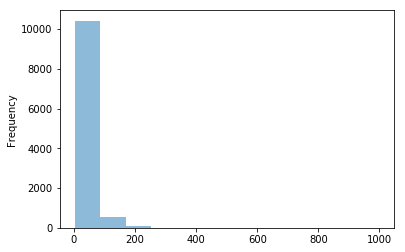

In [12]:
df['price'].plot.hist(bins=12, alpha=0.5);

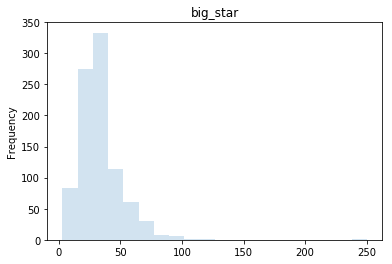

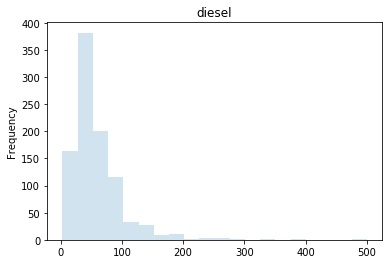

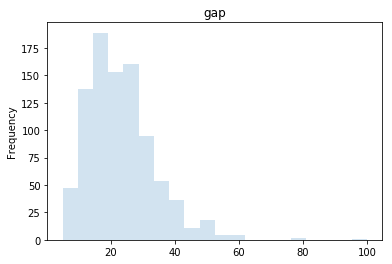

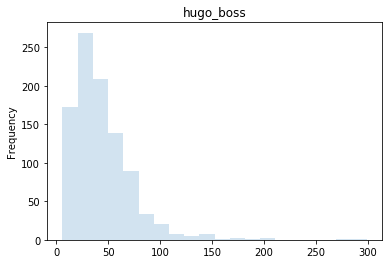

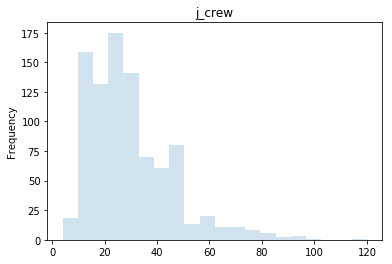

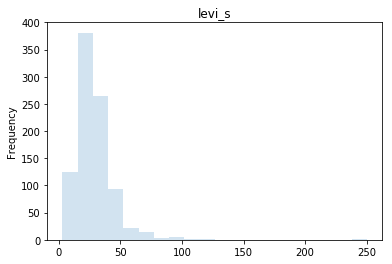

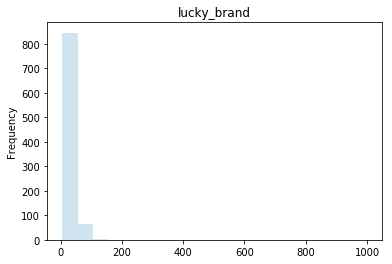

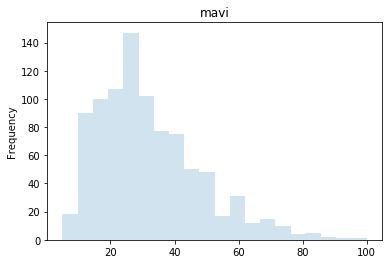

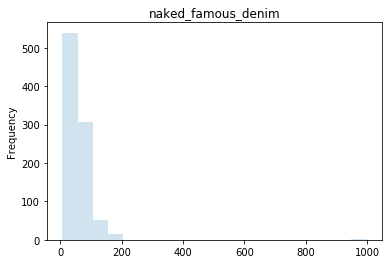

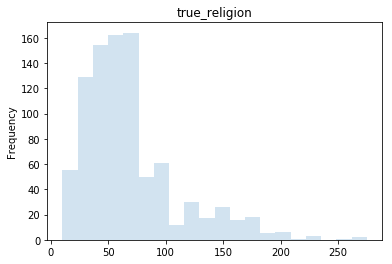

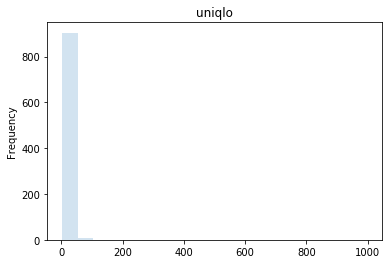

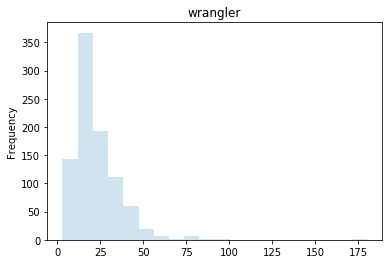

In [13]:
distinct_keys = df['brand'].unique()
for key in distinct_keys:
    plt.figure();
    df_subset = df[df.brand==key]
    df_subset['price'].plot.hist(bins=20, alpha=0.2, title=key);

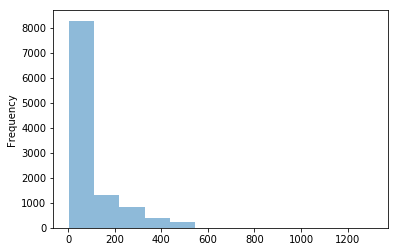

In [14]:
# Distribution of days listed
df['diff'].plot.hist(bins=12, alpha=0.5);

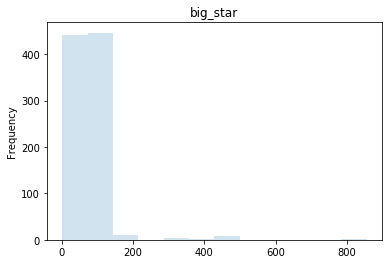

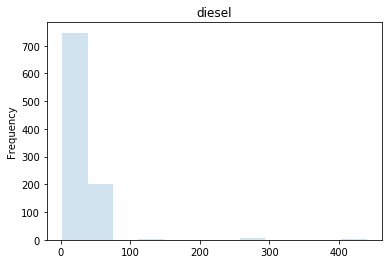

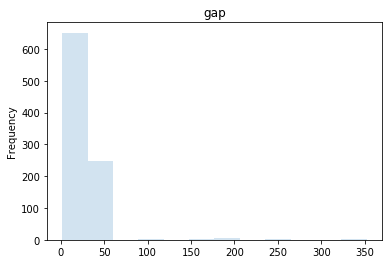

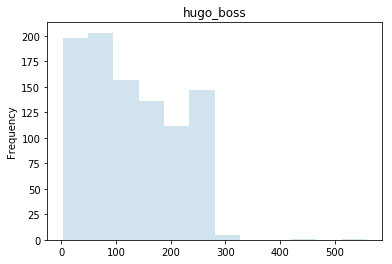

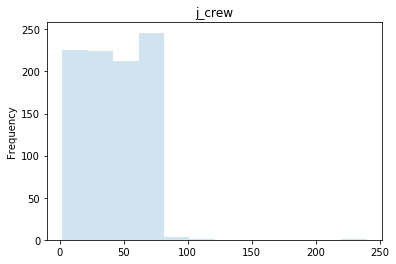

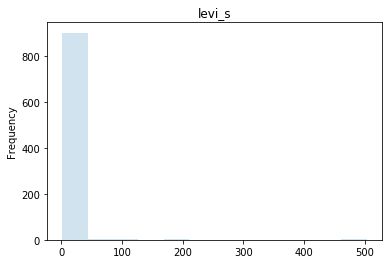

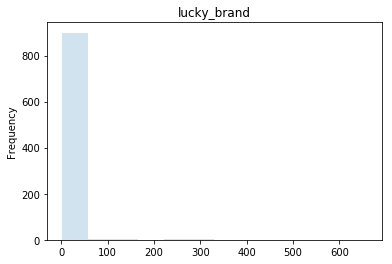

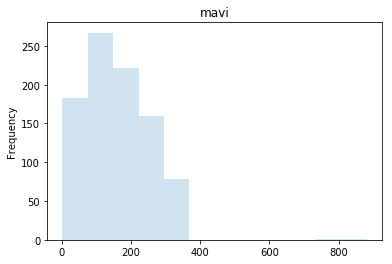

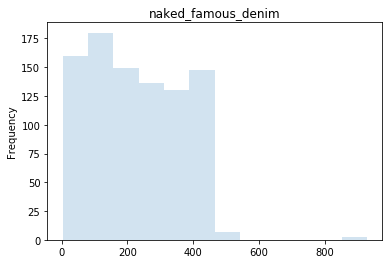

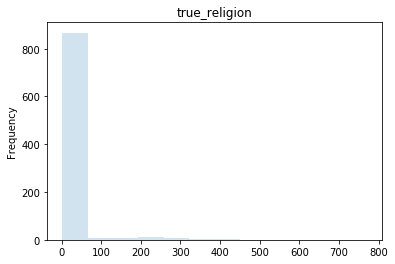

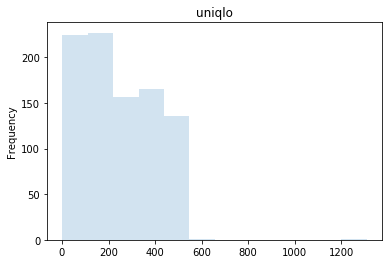

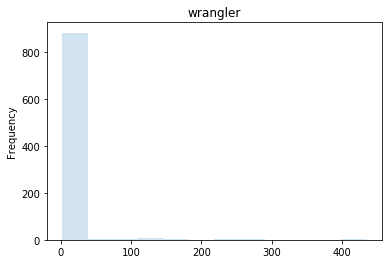

In [15]:
distinct_keys = df['brand'].unique()
for key in distinct_keys:
    plt.figure();
    df_subset = df[df.brand==key]
    df_subset['diff'].plot.hist(bins=12, alpha=0.2, title=key);

In [16]:
sold_df = df[df['sold'] == True]
sold_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 17 to 11019
Data columns (total 13 columns):
brand     3410 non-null object
date      3410 non-null object
diff      3410 non-null int64
image     3410 non-null object
length    3410 non-null int64
link      3410 non-null object
nwt       3410 non-null bool
price     3410 non-null int64
size      3290 non-null float64
sold      3410 non-null bool
status    580 non-null object
stock     3410 non-null object
title     3410 non-null object
dtypes: bool(2), float64(1), int64(3), object(7)
memory usage: 326.3+ KB


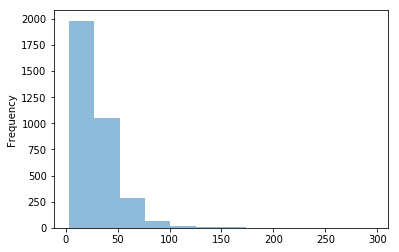

In [17]:
sold_df['price'].plot.hist(bins=12, alpha=0.5);

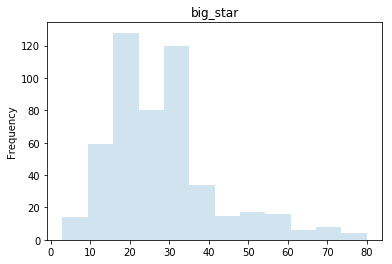

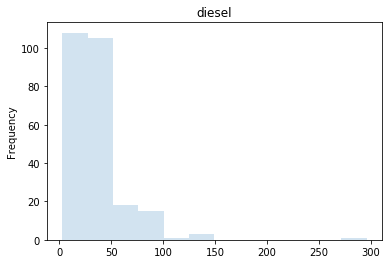

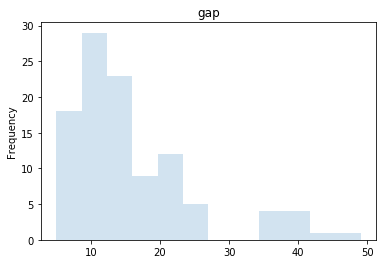

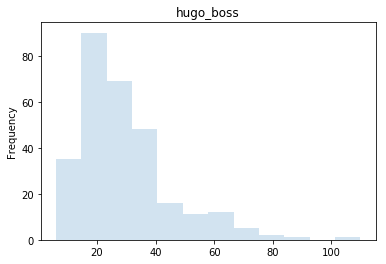

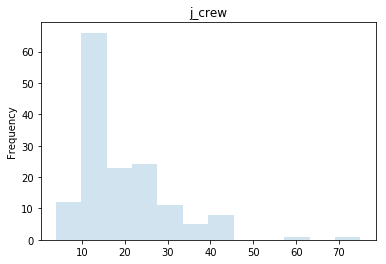

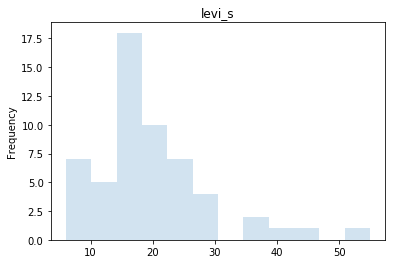

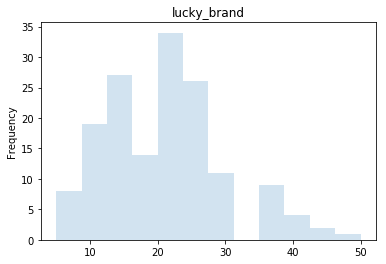

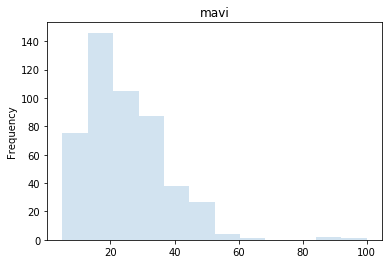

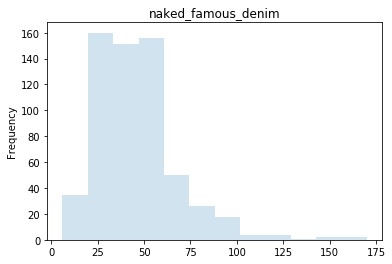

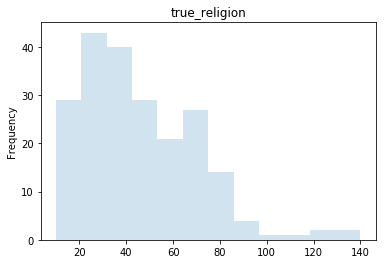

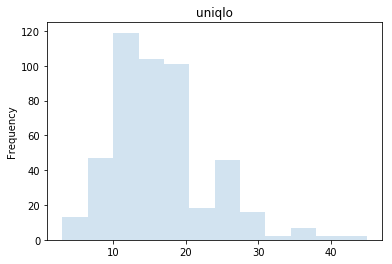

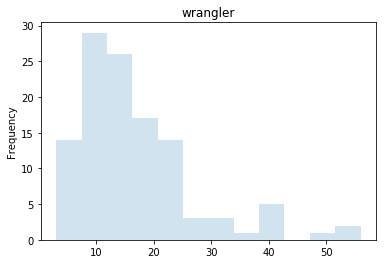

In [18]:
distinct_keys = sold_df['brand'].unique()
for key in distinct_keys:
    plt.figure();
    df_subset = sold_df[sold_df.brand==key]
    df_subset['price'].plot.hist(bins=12, alpha=0.2, title=key);